In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib.patheffects as path_effects
import os
import pandas as pd
from matplotlib.colors import LogNorm
from matplotlib import ticker

In [118]:
qcode = "HGP_100_4.qcode"
# qcode = "HGP_C422_200_4.qcode"

def ler_per_round(ax, qcode, label, color, marker):
    f_path = f"../../results/"
    f_name = f"{qcode}.res"

    df = pd.read_csv(f_path+f_name)
    df = df[(df['r'] % 10 == 0)]
    df = df.sort_values(by='r')
    # df = df[(df['r'] > 20)]
    df['p_error'] = 1 - df['p_log']
    df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['num_test'])

    df['p_error'].replace(to_replace=0, value=0.5, inplace=True)

    df['ler_per_round'] = 1 - (1 - df['p_error'])**(1/df['r'])
    df['error_bars'] = (1 - df['p_error'])**(1/(df['r']-1)) * df['p_std_dev'] / df['r']

    ax.errorbar(df['r'], df['ler_per_round'], df['error_bars'], label=label, fmt=f"{marker}-", c=color, ms=4)
    # ax.scatter(df['r'], df['ler_per_round'], label=qcode, marker='o', s=5)

def threshold(ax, qcode, label, color, marker):
    f_path = f"../../results/"
    f_name = f"{qcode}.res"

    df = pd.read_csv(f_path+f_name)

    df['p_error'] = 1 - df['p_log']
    df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['num_test'])
    df = df[(df['p_std_dev'] > 0)]
    df = df[(df['p_phys'] < 0.0027)]


    df['p_error'].replace(to_replace=0, value=0.5, inplace=True)

    df['ler_per_round'] = 1 - (1 - df['p_error'])**(1/df['r'])
    df['error_bars'] = (1 - df['p_error'])**(1/(df['r']-1)) * df['p_std_dev'] / df['r']

    ax.errorbar(df['p_phys'], df['ler_per_round'], df['error_bars'], label=label, fmt=f"{marker}-", c=color, ms=4)
    # ax.scatter(df['r'], df['ler_per_round'], label=qcode, marker='o', s=5)

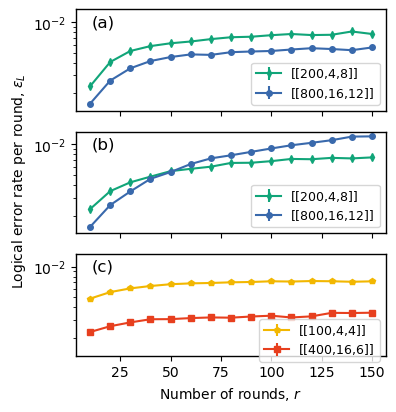

In [ ]:
# plt.rc('font', family='serif')
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1

fig, ax = plt.subplots(3, 1, figsize=(4,4.5), sharex=True, sharey=True)

colors = ['#7F3C8D','#11A579','#3969AC','#F2B701','#e73f1e','#80BA5A','#E68310','#008695','#CF1C90','#f97b72','#4b4b8f','#A5AA99']
colors = colors[1:]
markers = ['d','o','p','s']

# ler_per_round(ax[0], "cat10/HGP_100_4.qcode")
# ler_per_round(ax, "HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats0/HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats10/HGP_C422_200_4.qcode")
# folder = "FT0"
folder = "parameter_testing/expander_p_0.001"
folder2 = "parameter_testing/expander_p_0.001/nounmasking"
folder3 = "parameter_testing/expander_p_0.001/unmasking"

ler_per_round(ax[0], f"{folder3}/HGP_C422_200_4.qcode", "[[200,4,8]]", colors[0], markers[0])
ler_per_round(ax[0], f"{folder3}/HGP_C422_800_16.qcode", "[[800,16,12]]", colors[1], markers[1])

ler_per_round(ax[1], f"{folder2}/HGP_C422_200_4.qcode", "[[200,4,8]]", colors[0], markers[0])
ler_per_round(ax[1], f"{folder2}/HGP_C422_800_16.qcode", "[[800,16,12]]", colors[1], markers[1])

ler_per_round(ax[2], f"{folder}/HGP_100_4.qcode", "[[100,4,4]]", colors[2], markers[2])
ler_per_round(ax[2], f"{folder}/HGP_400_16.qcode", "[[400,16,6]]",colors[3], markers[3])

ax[0].legend(loc='lower right', fontsize=9)
ax[1].legend(loc='lower right', fontsize=9)
ax[2].legend(loc='lower right', bbox_to_anchor=(1.0, -0.12), fontsize=9)

# ax[0].set_ylabel(r"Logical error rate per round, $\epsilon_L$")
# ax[0].set_xlabel(r"Number of rounds, $r$")
ax[2].set_xlabel(r"Number of rounds, $r$")
# ax[2].set_xlabel(r"Number of cycles, $r$")
fig.text(-0.04, 0.5, r"Logical error rate per round, $\epsilon_L$", va='center', rotation='vertical')
# ax[0].set_title("Unmasking")
# ax[1].set_title("No unmasking")
# ax[2].set_title("Non-concatenated HGP codes")

labels = ['(a)', '(b)', '(c)']
for a, label in zip(ax, labels):
    a.text(0.05, 0.95, label, transform=a.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left')


ax[0].set_yscale('log')
# plt.tight_layout()

plt.savefig("../notsingleshot.png", dpi=600, bbox_inches="tight")

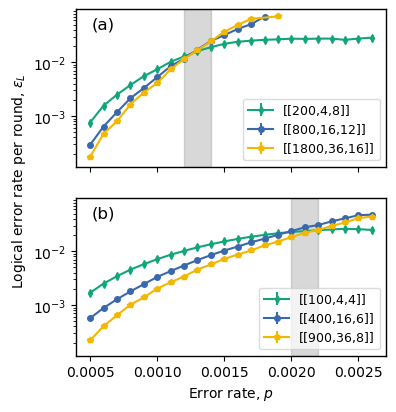

In [130]:
plt.rcParams['axes.linewidth'] = 1

fig, ax = plt.subplots(2, 1, figsize=(4,4.5), sharex=True, sharey=True)

colors = ['#7F3C8D','#11A579','#3969AC','#F2B701','#e73f1e','#80BA5A','#E68310','#008695','#CF1C90','#f97b72','#4b4b8f','#A5AA99']
colors = colors[1:]
markers = ['d','o','p','s']

# ler_per_round(ax[0], "cat10/HGP_100_4.qcode")
# ler_per_round(ax, "HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats0/HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats10/HGP_C422_200_4.qcode")
# folder = "FT0"
folder = "threshold"
folder2 = folder
folder3 = folder

threshold(ax[0], f"{folder3}/HGP_C422_200_4.qcode", "[[200,4,8]]", colors[0], markers[0])
threshold(ax[0], f"{folder3}/HGP_C422_800_16.qcode", "[[800,16,12]]", colors[1], markers[1])
threshold(ax[0], f"{folder3}/HGP_C422_1800_36.qcode", "[[1800,36,16]]", colors[2], markers[2])

# ler_per_round(ax[1], f"{folder2}/HGP_C422_200_4.qcode", "[[200,4,8]]", colors[0], markers[0])
# ler_per_round(ax[1], f"{folder2}/HGP_C422_800_16.qcode", "[[800,16,12]]", colors[1], markers[1])

threshold(ax[1], f"{folder}/HGP_100_4.qcode", "[[100,4,4]]", colors[0], markers[0])
threshold(ax[1], f"{folder}/HGP_400_16.qcode", "[[400,16,6]]",colors[1], markers[1])
threshold(ax[1], f"{folder}/HGP_900_36.qcode", "[[900,36,8]]",colors[2], markers[2])

ax[0].axvspan(0.0012, 0.0014, color='gray', alpha=0.3)
ax[1].axvspan(0.002, 0.0022, color='gray', alpha=0.3)

labels = ['(a)', '(b)', '(c)']
for a, label in zip(ax, labels):
    a.text(0.05, 0.95, label, transform=a.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left')

fig.text(-0.04, 0.5, r"Logical error rate per round, $\epsilon_L$", va='center', rotation='vertical')

ax[0].legend(loc='lower right', fontsize=9, framealpha=0.7)
ax[1].legend(loc='lower right', fontsize=9, framealpha=0.7)
ax[0].set_yscale('log')

ax[1].set_xlabel(r"Error rate, $p$")

plt.savefig("../threshold.png", dpi=600, bbox_inches="tight")


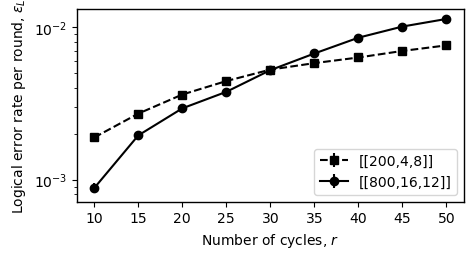

In [289]:
# plt.rc('font', family='serif')
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1

fig, ax = plt.subplots(1, 1, figsize=(5,2.5), sharey=True)

# ler_per_round(ax[0], "cat10/HGP_100_4.qcode")
# ler_per_round(ax, "HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats0/HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats10/HGP_C422_200_4.qcode")
folder = "FT0"
# folder2 = "extra/20"


qcode = f"{folder}/HGP_C422_200_4.qcode"
f_path = f"../../results/parameter_testing/"
f_name = f"{qcode}.res"

df = pd.read_csv(f_path+f_name)
df = df[(df['r'] % 5 == 0)]
# df = df[(df['r'] > 20)]
df['p_error'] = 1 - df['p_log']
df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['num_test'])

df['p_error'].replace(to_replace=0, value=0.5, inplace=True)

df['ler_per_round'] = 1 - (1 - df['p_error'])**(1/df['r'])
df['error_bars'] = (1 - df['p_error'])**(1/(df['r']-1)) * df['p_std_dev'] / df['r']

marker = 's'
ax.errorbar(df['r'], df['ler_per_round'], df['error_bars'], c='k', label="[[200,4,8]]", fmt='--', marker=marker)




qcode = f"{folder}/HGP_C422_800_16.qcode"
f_path = f"../../results/parameter_testing/"
f_name = f"{qcode}.res"

df = pd.read_csv(f_path+f_name)
df = df[(df['r'] % 5 == 0)]
# df = df[(df['r'] > 20)]
df['p_error'] = 1 - df['p_log']
df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['num_test'])

df['p_error'].replace(to_replace=0, value=0.5, inplace=True)

df['ler_per_round'] = 1 - (1 - df['p_error'])**(1/df['r'])
df['error_bars'] = (1 - df['p_error'])**(1/(df['r']-1)) * df['p_std_dev'] / df['r']

marker = 'o'
ax.errorbar(df['r'], df['ler_per_round'], df['error_bars'], c='k', label="[[800,16,12]]", fmt='-', marker=marker)

# ler_per_round(ax[0], f"{folder2}/HGP_C422_200_4.qcode", 1)
# ler_per_round(ax[0], f"{folder2}/HGP_C422_800_16.qcode", 1)

ax.legend(loc='lower right')

ax.set_ylabel(r"Logical error rate per round, $\epsilon_L$")
ax.set_xlabel(r"Number of cycles, $r$")

ax.set_yscale('log')
